In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load datasets
df_sentiment = pd.read_csv('csv_files/fear_greed_index.csv')
df_traders = pd.read_csv('csv_files/historical_data.csv')

In [5]:
# Strip spaces from columns
df_sentiment.columns = df_sentiment.columns.str.strip()
df_traders.columns = df_traders.columns.str.strip()

In [6]:
# Convert 'date' to datetime and normalize (remove time)
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.normalize()

In [7]:
# Convert and normalize Timestamp in traders data
df_traders['Timestamp'] = pd.to_datetime(df_traders['Timestamp'])
df_traders['date'] = df_traders['Timestamp'].dt.normalize()

In [8]:
# Drop unnecessary columns
df_traders.drop(['Timestamp', 'Timestamp IST'], axis=1, inplace=True)

In [9]:
# Inner merge on normalized 'date' column
df_merged = pd.merge(
    df_traders,
    df_sentiment[['date', 'value', 'classification']],
    on='date',
    how='outer'  # Only rows with matching 'date' in both dataframes are kept
)

In [10]:
# Fill missing sentiment 'value' and 'classification' with mode from sentiment data
mode_value = df_sentiment['classification'].mode().iloc[0]
df_merged['value'] = df_merged['value'].fillna(0)
df_merged['classification'] = df_merged['classification'].fillna(mode_value)

In [11]:
# Check classification distribution
print(df_merged['classification'].value_counts(dropna=False))

classification
Fear             212005
Greed               633
Extreme Fear        508
Neutral             396
Extreme Greed       326
Name: count, dtype: int64


In [12]:
print(df_merged['classification'].value_counts())

classification
Fear             212005
Greed               633
Extreme Fear        508
Neutral             396
Extreme Greed       326
Name: count, dtype: int64


In [13]:
# Display first few rows of merged dataframe
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1970-01-01,0.0,Fear
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1970-01-01,0.0,Fear
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1970-01-01,0.0,Fear
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1970-01-01,0.0,Fear
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1970-01-01,0.0,Fear


In [14]:
df_merged.shape
print(f'The total rows {df_merged.shape[0]} and columns {df_merged.shape[1]}')

The total rows 213868 and columns 17


In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213868 entries, 0 to 213867
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  float64       
 11  Crossed           211224 non-null  object        
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  date

In [16]:
df_merged.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,date,value
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,213868,213868.000000
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1970-08-22 12:02:18.971702172,0.580816
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1970-01-01 00:00:00,0.000000
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1970-01-01 00:00:00,0.000000
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1970-01-01 00:00:00,0.000000
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1970-01-01 00:00:00,0.000000
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,2025-05-02 00:00:00,95.000000
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,NaN,5.730460


In [17]:
df_merged.isnull().sum()

Account             2644
Coin                2644
Execution Price     2644
Size Tokens         2644
Size USD            2644
Side                2644
Start Position      2644
Direction           2644
Closed PnL          2644
Transaction Hash    2644
Order ID            2644
Crossed             2644
Fee                 2644
Trade ID            2644
date                   0
value                  0
classification         0
dtype: int64

In [18]:
df_merged.duplicated().sum()

np.int64(0)

In [19]:
df_merged.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'date', 'value',
       'classification'],
      dtype='object')

In [20]:
df_merged.head(1)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1970-01-01,0.0,Fear


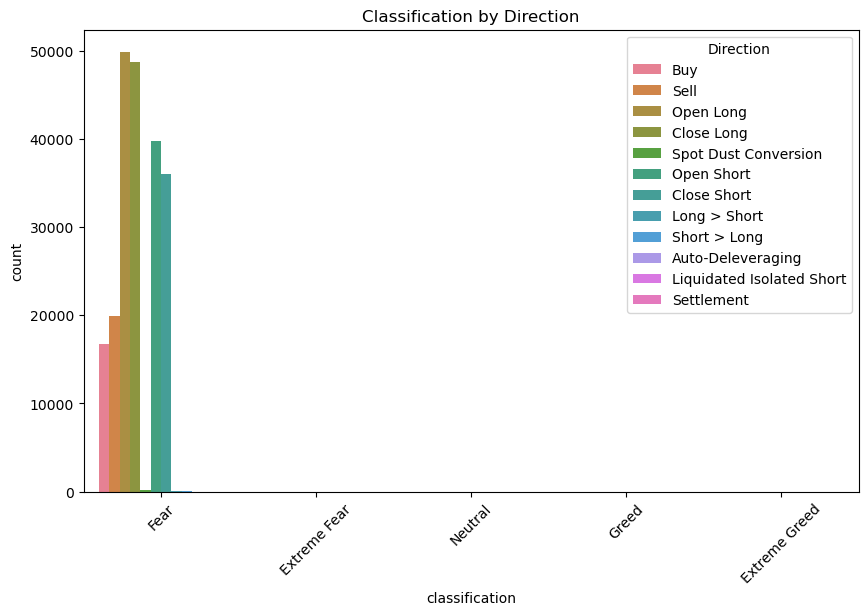

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x="classification", hue="Direction", data=df_merged)
plt.title("Classification by Direction")
plt.xticks(rotation=45)
plt.show()

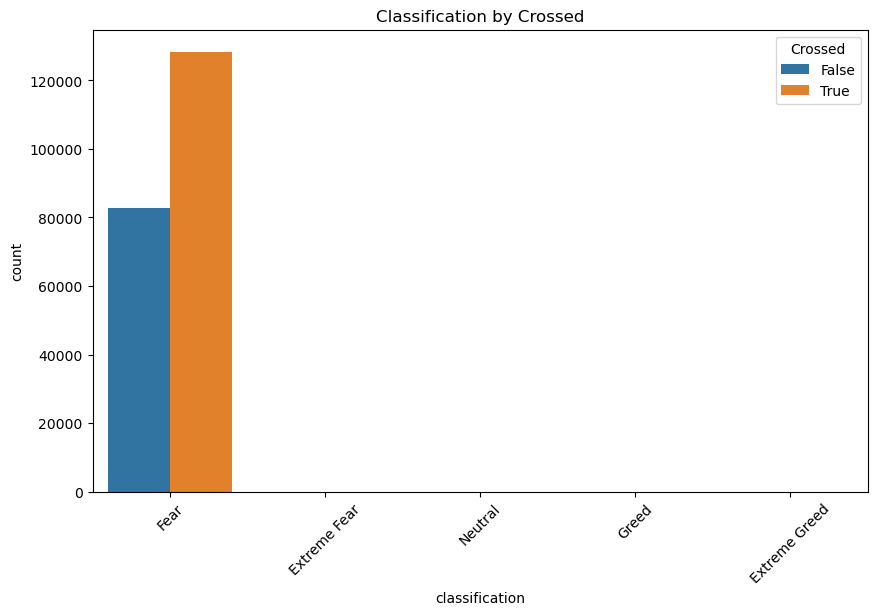

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x="classification", hue="Crossed", data=df_merged)
plt.title("Classification by Crossed")
plt.xticks(rotation=45)
plt.show()

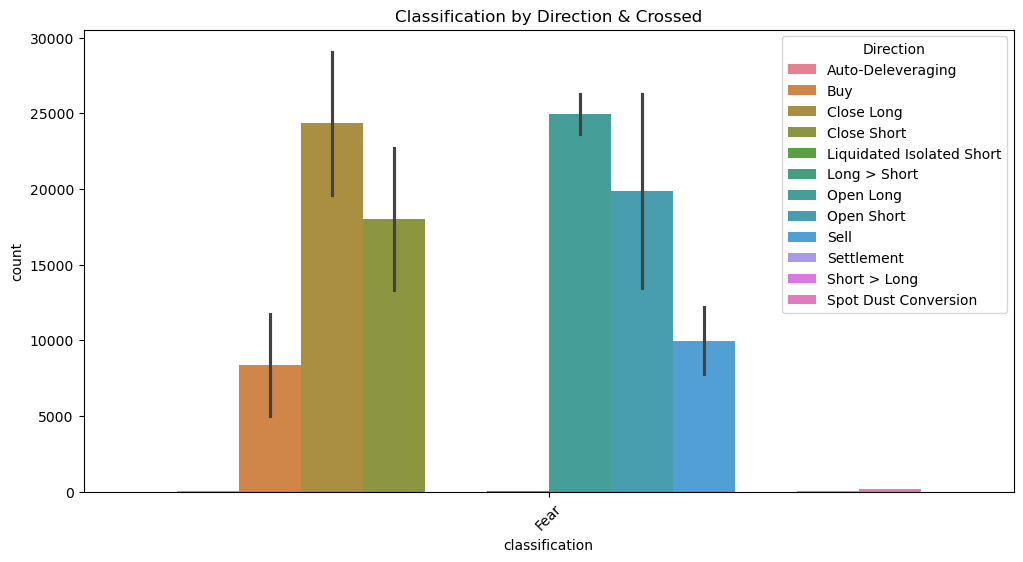

In [23]:
pivot = df_merged.groupby(["Direction","Crossed","classification"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.barplot(x="classification", y="count", hue="Direction", data=pivot, dodge=True)
plt.title("Classification by Direction & Crossed")
plt.xticks(rotation=45)
plt.show()

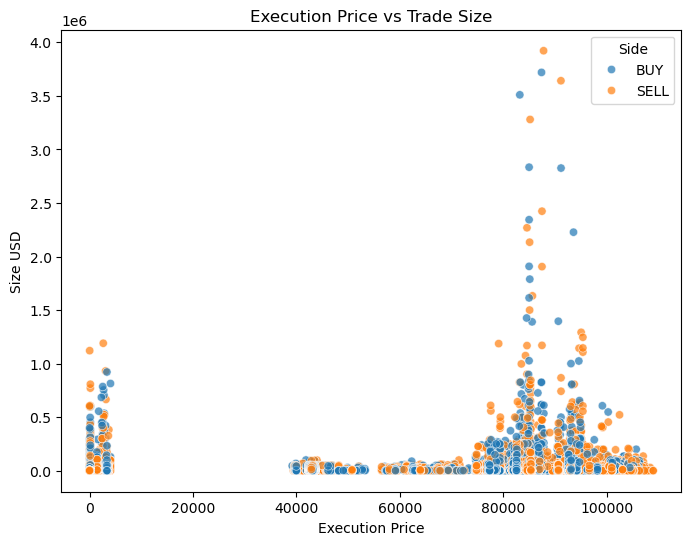

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Execution Price', y='Size USD', hue='Side', data=df_merged, alpha=0.7)
plt.title("Execution Price vs Trade Size")
plt.show()

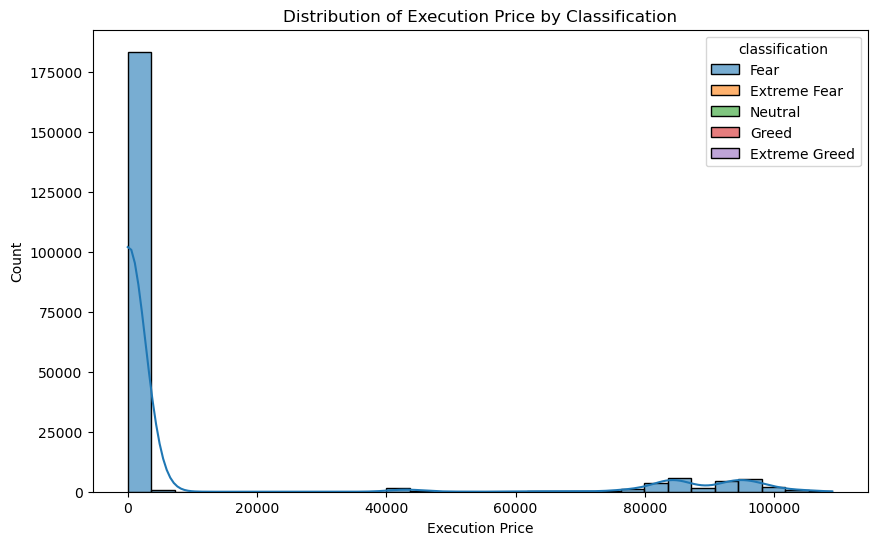

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged, x="Execution Price", hue="classification", bins=30, kde=True, alpha=0.6)
plt.title("Distribution of Execution Price by Classification")
plt.show()

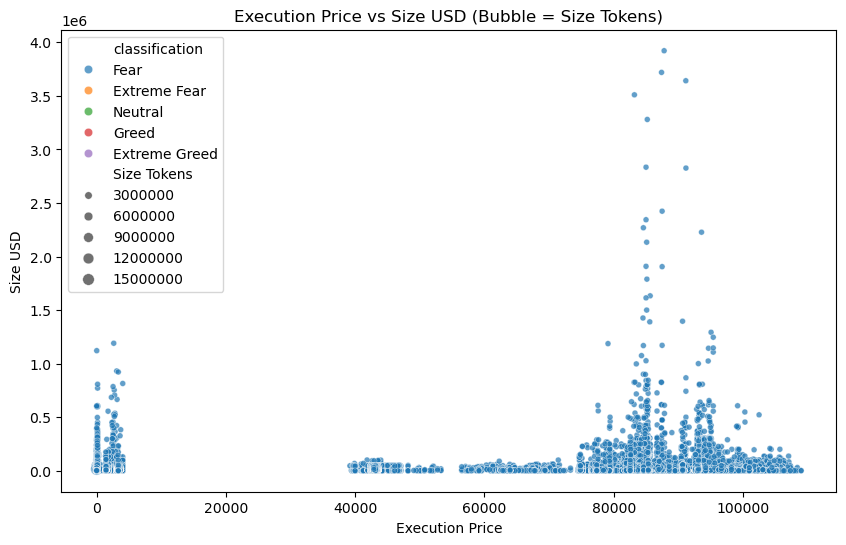

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Execution Price", y="Size USD", hue="classification", size="Size Tokens", data=df_merged, alpha=0.7)
plt.title("Execution Price vs Size USD (Bubble = Size Tokens)")
plt.show()

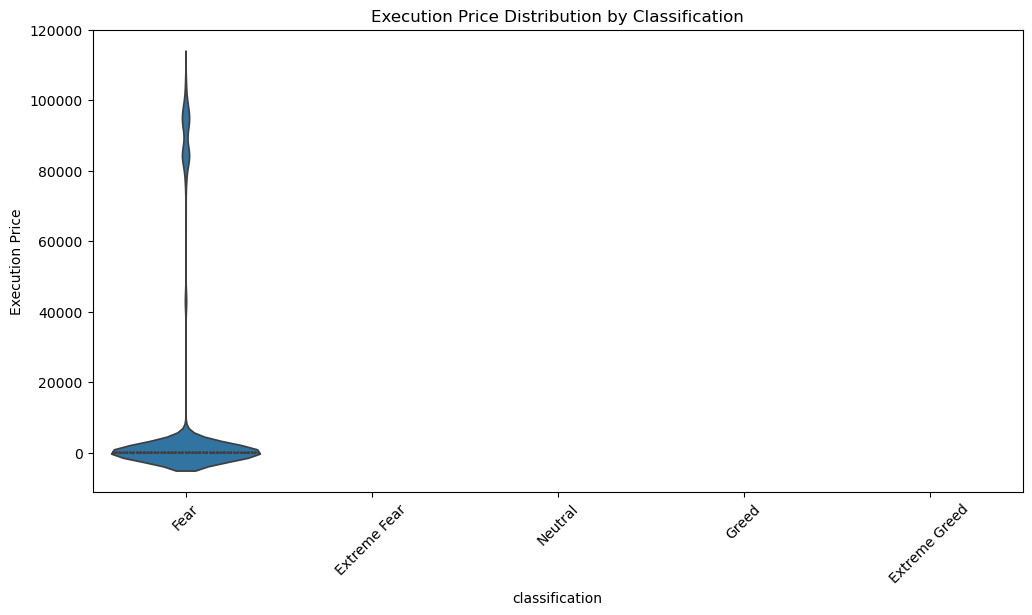

In [27]:
plt.figure(figsize=(12,6))
sns.violinplot(x="classification", y="Execution Price", data=df_merged, inner="quartile")
plt.title("Execution Price Distribution by Classification")
plt.xticks(rotation=45)
plt.show()

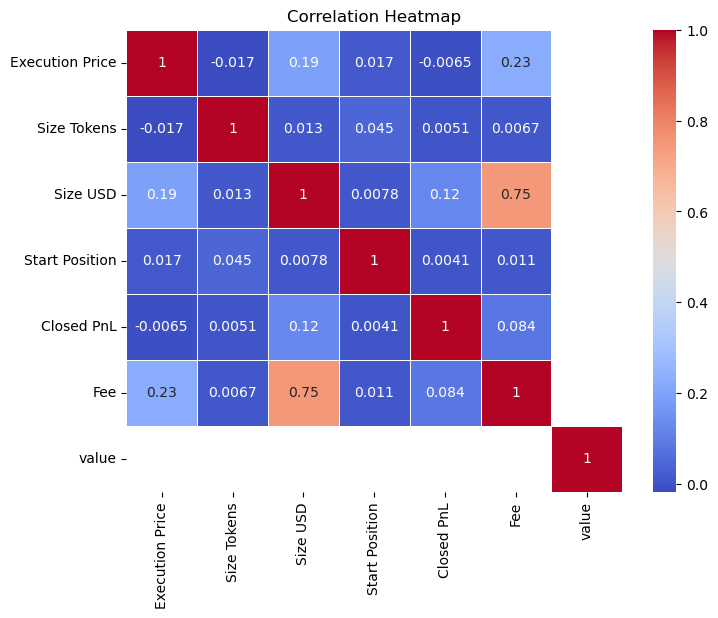

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df_merged[['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee','value']].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
df_merged.dtypes

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                   float64
Crossed                     object
Fee                        float64
Trade ID                   float64
date                datetime64[ns]
value                      float64
classification              object
dtype: object

In [30]:
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1970-01-01,0.0,Fear
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1970-01-01,0.0,Fear
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1970-01-01,0.0,Fear
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1970-01-01,0.0,Fear
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1970-01-01,0.0,Fear


In [31]:
df_merged['Coin'].value_counts()

Coin
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
        ...  
@18         1
@30         1
@25         1
@86         1
@68         1
Name: count, Length: 246, dtype: int64

In [32]:
df_merged['Side'].value_counts()

Side
SELL    108528
BUY     102696
Name: count, dtype: int64

In [33]:
df_merged['Direction'].value_counts()

Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

In [34]:
df_merged['classification'].value_counts()

classification
Fear             212005
Greed               633
Extreme Fear        508
Neutral             396
Extreme Greed       326
Name: count, dtype: int64

In [35]:
df_merged.shape

(213868, 17)

In [36]:
df_merged['year'] = df_merged['date'].dt.year.astype(int)
df_merged['month'] = df_merged['date'].dt.month.astype(int)

df_merged.drop(['date'],axis=1,inplace=True)

In [37]:
df_merged.drop(['Transaction Hash','Order ID','Trade ID'],axis=1,inplace=True)

In [38]:
df_merged.head(1)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,value,classification,year,month
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,0.0,True,0.345404,0.0,Fear,1970,1


In [39]:
df_merged.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee', 'value',
       'classification', 'year', 'month'],
      dtype='object')

In [40]:
df_merged.dtypes

Account             object
Coin                object
Execution Price    float64
Size Tokens        float64
Size USD           float64
Side                object
Start Position     float64
Direction           object
Closed PnL         float64
Crossed             object
Fee                float64
value              float64
classification      object
year                 int64
month                int64
dtype: object

In [41]:
df_merged.isnull().sum()

Account            2644
Coin               2644
Execution Price    2644
Size Tokens        2644
Size USD           2644
Side               2644
Start Position     2644
Direction          2644
Closed PnL         2644
Crossed            2644
Fee                2644
value                 0
classification        0
year                  0
month                 0
dtype: int64

In [42]:
# Numeric fill with median
num_cols = ['Execution Price','Size Tokens','Size USD','Closed PnL','Fee']
df_merged[num_cols] = df_merged[num_cols].fillna(df_merged[num_cols].median())

# Categorical fill with mode
cat_cols = ['Account','Coin','Side','Start Position','Direction','Crossed']
for col in cat_cols:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

# Check again
print(df_merged.isnull().sum())

Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Start Position     0
Direction          0
Closed PnL         0
Crossed            0
Fee                0
value              0
classification     0
year               0
month              0
dtype: int64


In [43]:
df_merged.duplicated().sum()

np.int64(1209)

In [44]:
# Remove duplicate rows
df_merged = df_merged.drop_duplicates()

# Reset index after dropping
df_merged = df_merged.reset_index(drop=True)

# Check again
print("Duplicates left:", df_merged.duplicated().sum())
print("New shape:", df_merged.shape)

Duplicates left: 0
New shape: (212659, 15)


In [45]:
x = df_merged[['Account','Coin','Execution Price','Size Tokens','Size USD','Side',
 'Start Position','Direction','Closed PnL','Crossed','Fee','value',
 'year','month']]

In [46]:
y = df_merged['classification']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Feature groups
num_features = ['Execution Price','Size Tokens','Size USD','Closed PnL','Fee','value']
cat_features = ['Account','Coin','Side','Start Position','Direction','Crossed']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Logistic Regression pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train
clf.fit(x_train, y_train)

# Evaluate
y_pred = clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("===========================================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================================")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

 Extreme Fear       1.00      0.82      0.90        45
Extreme Greed       1.00      0.86      0.93        29
         Fear       1.00      1.00      1.00     42330
        Greed       0.95      1.00      0.97        71
      Neutral       1.00      0.95      0.97        57

     accuracy                           1.00     42532
    macro avg       0.99      0.93      0.95     42532
 weighted avg       1.00      1.00      1.00     42532

Confusion Matrix:
 [[   37     0     8     0     0]
 [    0    25     0     4     0]
 [    0     0 42330     0     0]
 [    0     0     0    71     0]
 [    0     0     3     0    54]]
Accuracy Score: 0.999647324367535


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Feature groups
num_features = ['Execution Price','Size Tokens','Size USD','Closed PnL','Fee','value']
cat_features = ['Account','Coin','Side','Start Position','Direction','Crossed']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Model pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train
clf.fit(x_train, y_train)

# Evaluate
y_pred = clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("===========================================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================================")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

 Extreme Fear       1.00      1.00      1.00        45
Extreme Greed       1.00      1.00      1.00        29
         Fear       1.00      1.00      1.00     42330
        Greed       1.00      1.00      1.00        71
      Neutral       1.00      1.00      1.00        57

     accuracy                           1.00     42532
    macro avg       1.00      1.00      1.00     42532
 weighted avg       1.00      1.00      1.00     42532

Confusion Matrix:
 [[   45     0     0     0     0]
 [    0    29     0     0     0]
 [    0     0 42330     0     0]
 [    0     0     0    71     0]
 [    0     0     0     0    57]]
Accuracy Score: 1.0


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Feature groups
num_features = ['Execution Price','Size Tokens','Size USD','Closed PnL','Fee','value']
cat_features = ['Account','Coin','Side','Start Position','Direction','Crossed']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Model pipeline (Decision Tree)
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42, max_depth=10))  # max_depth added to avoid overfitting
])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train
clf.fit(x_train, y_train)

# Evaluate
y_pred = clf.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("===========================================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("===========================================")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

 Extreme Fear       1.00      1.00      1.00        45
Extreme Greed       1.00      1.00      1.00        29
         Fear       1.00      1.00      1.00     42330
        Greed       1.00      1.00      1.00        71
      Neutral       1.00      1.00      1.00        57

     accuracy                           1.00     42532
    macro avg       1.00      1.00      1.00     42532
 weighted avg       1.00      1.00      1.00     42532

Confusion Matrix:
 [[   45     0     0     0     0]
 [    0    29     0     0     0]
 [    0     0 42330     0     0]
 [    0     0     0    71     0]
 [    0     0     0     0    57]]
Accuracy Score: 1.0


In [50]:
# Training accuracy
y_train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 1.0
Test Accuracy: 1.0


In [51]:
import joblib

# Save trained pipeline
joblib.dump(clf, "model.pkl")
print("Model saved as model.pkl")

Model saved as model.pkl
